# F70/71: Mechanics and Vacuum Technology

Experiment carried out by Mathieu Kaltschmidt and Quirinus Schwarzenböck in cooperation with Tobias Schröder and Max Victor Spreng as part of the advanced physics lab course (FP) at INF501 in Heidelberg on the 3rd/4th of September 2018. <br>

__Supervisor:__ Rolf Bätzner <br>

In [99]:
import numpy as np
from numpy import linalg as la

import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.special import gamma


#Plot settings
plt.style.use('classic')
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9
plt.rcParams['errorbar.capsize']=2

## Pumping speed of the TMP

In [100]:
#DATA
pressure,pressure_err, vol, vol_err, time, time_err =np.loadtxt(r'DATA/pumping speed/pumping_speed.csv', skiprows=1,delimiter=',', usecols = (0,1,2,3,4,5), unpack=True)

In [95]:
#Prepare for plotting
ps =  vol / time / pressure
ps_err = np.sqrt((vol_err/time/pressure)**2+(vol*time_err/pressure/time**2)**2+(vol*pressure_err/time/pressure**2)**2)

In [96]:
#Fitting

def const(x,c0):
    return c0

popt,pcov = curve_fit(const,pressure[:-4],ps[:-4],sigma=ps_err[:-4])

fitrange=np.linspace(5e-6,5e-2,2)

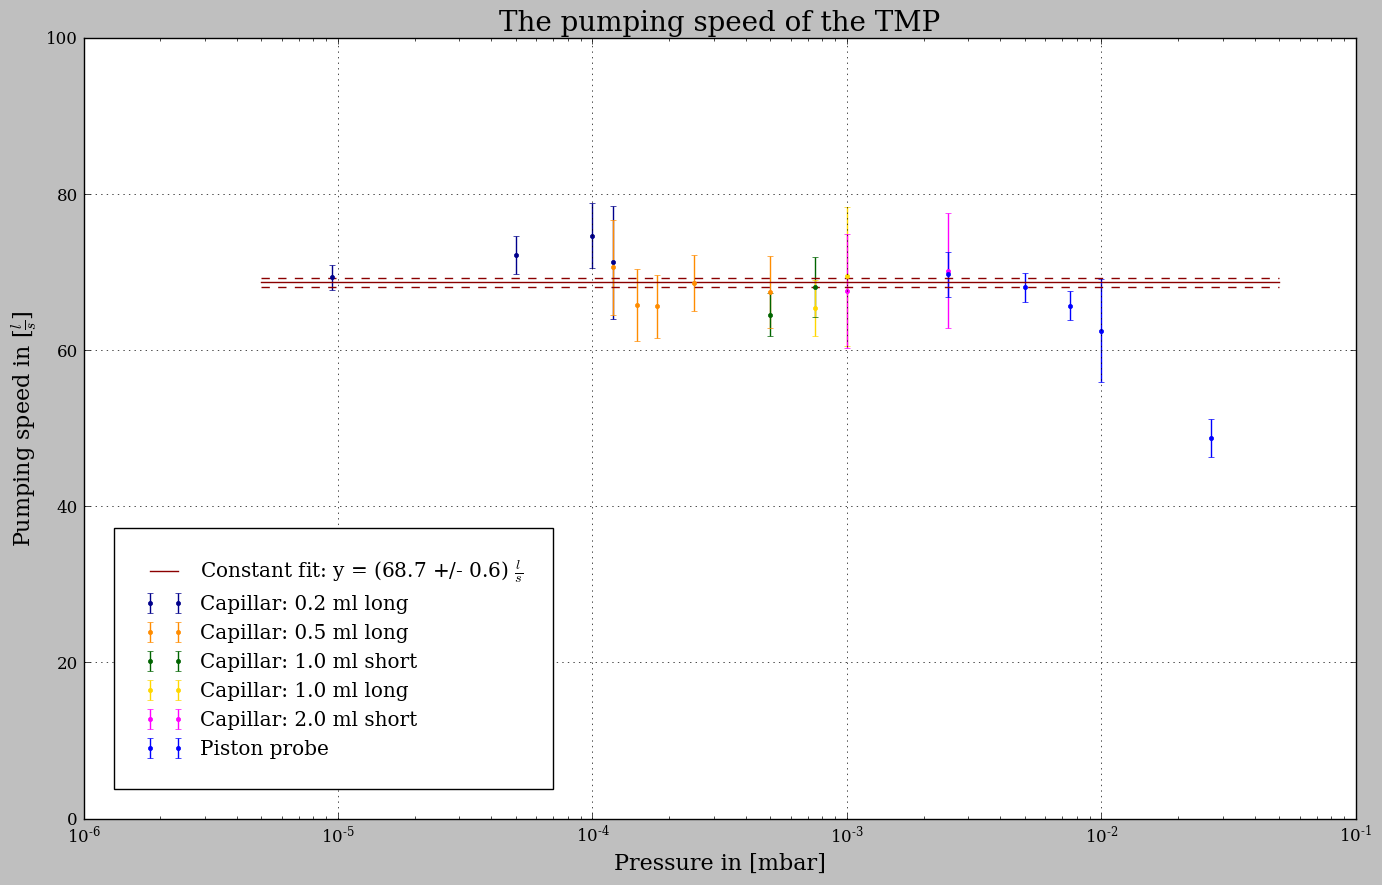

In [157]:
#Plotting

plt.errorbar(pressure[:4], ps[:4], yerr= ps_err[:4],linewidth=1,linestyle='',marker='.',color='darkblue',label='Capillar: 0.2 ml long ')
plt.errorbar(pressure[4:9], ps[4:9], yerr= ps_err[4:9],linewidth=1,linestyle='',marker='.',color='darkorange',label='Capillar: 0.5 ml long ')
plt.errorbar(pressure[9:11], ps[9:11], yerr= ps_err[9:11],linewidth=1,linestyle='',marker='.',color='darkgreen',label='Capillar: 1.0 ml short')
plt.errorbar(pressure[11:13], ps[11:13], yerr= ps_err[11:13],linewidth=1,linestyle='',marker='.',color='gold',label='Capillar: 1.0 ml long')
plt.errorbar(pressure[13:15], ps[13:15], yerr= ps_err[13:15],linewidth=1,linestyle='',marker='.',color='magenta',label='Capillar: 2.0 ml short')
plt.errorbar(pressure[15:-1], ps[15:-1], yerr= ps_err[15:-1],linewidth=1,linestyle='',marker='.',color='blue',label='Piston probe')



plt.plot(fitrange,popt*np.ones(2),color='darkred', label=r'Constant fit: y = (68.7 +/- 0.6) $\frac{l}{s}$')
plt.plot(fitrange,(popt+np.sqrt(pcov)[0,0])*np.ones(2),color='darkred', linestyle='dashed')
plt.plot(fitrange,(popt-np.sqrt(pcov)[0,0])*np.ones(2),color='darkred', linestyle='dashed')


plt.ylim(0,100)
#
plt.xscale('log')
plt.title("The pumping speed of the TMP", size = 20)
plt.xlabel(r'Pressure in [mbar]', size=16)
plt.ylabel(r'Pumping speed in [$\frac{l}{s}$]', size=16)

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')
plt.grid(ls='dotted')

#Saving figure
plt.tight_layout()
plt.savefig('Plots/pumping_speed.pdf', format='PDF')

## Measurement of conductance

In [273]:
#DATA
S=popt
S_err = np.sqrt(pcov[0])

pressureRO, pressureRO_err, pressureRU, pressureRU_err = np.loadtxt(r'DATA/conductance/rohr_single.csv', skiprows=1,delimiter=',', usecols = (0,1,2,3), unpack=True)
pressureBO, pressureBO_err, pressureBU, pressureBU_err = np.loadtxt(r'DATA/conductance/blende_single.csv', skiprows=1,delimiter=',', usecols = (0,1,2,3), unpack=True)
pressureRBO, pressureRBO_err, pressureRBU, pressureRBU_err = np.loadtxt(r'DATA/conductance/rohr_and_blende.csv', skiprows=1,delimiter=',', usecols = (0,1,2,3), unpack=True)

In [287]:
#Determination of conduction
deltap_R = np.abs(pressureRO-pressureRU)
deltap_R_err = np.sqrt(pressureRO_err**2+(pressureRU_err)**2)

deltap_B = np.abs(pressureBO-pressureBU)
deltap_B_err = np.sqrt(pressureBO_err**2+(pressureBU_err)**2)

deltap_RB = np.abs(pressureRBO-pressureRBU)
deltap_RB_err = np.sqrt(pressureRBO_err**2+(pressureRBU_err)**2)


cond_R = pressureRU*S/deltap_R
cond_R_err = np.sqrt((pressureRU_err*S/deltap_R)**2+(pressureRU*S_err/deltap_R)**2+(pressureRU*S*deltap_R_err/deltap_R**2)**2)

cond_B = pressureBU*S/deltap_B
cond_B_err = np.sqrt((pressureBU_err*S/deltap_B)**2+(pressureBU*S_err/deltap_B)**2+(pressureBU*S*deltap_B_err/deltap_B**2)**2)


cond_RB = pressureRBU*popt/delta_p_RB
cond_RB_err = np.sqrt((pressureRBU_err*S/deltap_RB)**2+(pressureRBU*S_err/deltap_RB)**2+(pressureRBU*S*deltap_RB_err/deltap_RB**2)**2)


#Errors for plotting 1/C
err_R = np.abs(cond_R_err/cond_R**2)
err_B = np.abs(cond_B_err/cond_B**2)
err_RB = np.abs(cond_RB_err/cond_RB**2)


In [281]:
#Probe of Kirchhoff's law 

#Matching values for almost same pressures to be able to calculate sum
cond_B_match = []
cond_B_match_err = []
for i in [0,3,5,6,8,10,11,15,16]:
    cond_B_match.append(cond_B[i])
    cond_B_match_err.append(cond_B_err[i])
    
cond_B_match = np.array([cond_B_match])
cond_B_match_err = np.array([cond_B_match_err])

cond_R_match = []
cond_R_match_err = []
pressure_match = []
for i in [0,4,5,7,8,10,11,13,14]:
    cond_R_match.append(cond_R[i])
    cond_R_match_err.append(cond_R_err[i])
    pressure_match.append(pressureRU[i])
    
cond_R_match = np.array([cond_R_match])
cond_R_match_err = np.array([cond_R_match_err])
pressure_match = np.array([pressure_match])


probe_kirchhoff = 1/(1/cond_R_match + 1/cond_B_match)
probe_kirchhoff_err = np.sqrt(((cond_R_match_err/cond_R_match**2)*(1/cond_R_match+1/cond_B_match)**(-2))**2+((cond_B_match_err/cond_B_match**2)*(1/cond_R_match+1/cond_B_match)**(-2))**2)

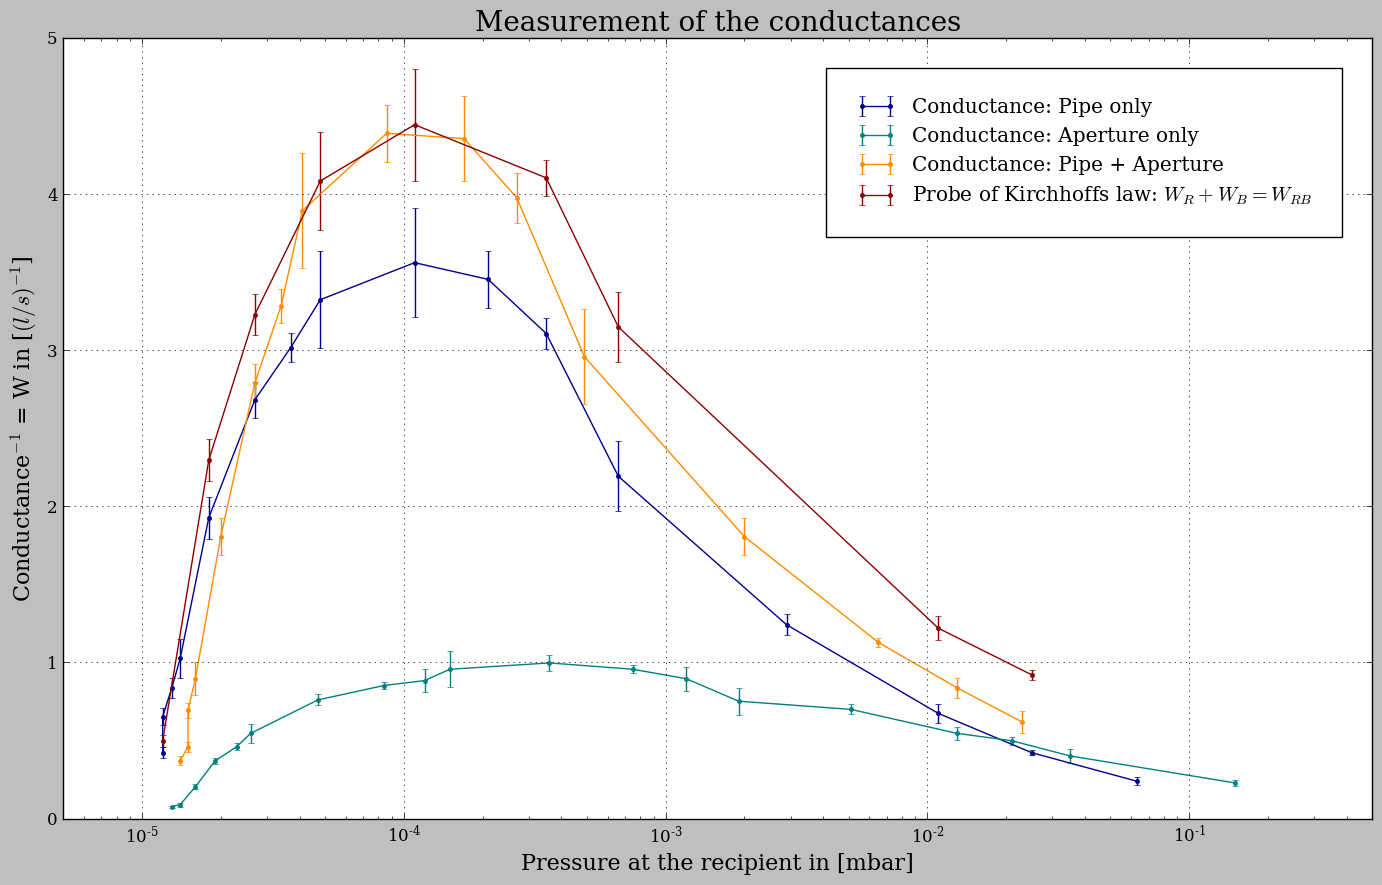

In [286]:
#Plotting
plt.errorbar(pressureRU, 1/cond_R ,yerr=err_R,linewidth=1,linestyle='-',marker='.',color='darkblue',label='Conductance: Pipe only')
plt.errorbar(pressureBU, 1/cond_B ,yerr=err_B,linewidth=1,linestyle='-',marker='.',color='teal',label='Conductance: Aperture only')
plt.errorbar(pressureRBU, 1/cond_RB ,yerr=err_RB,linewidth=1,linestyle='-',marker='.',color='darkorange',label='Conductance: Pipe + Aperture ')
plt.errorbar(pressure_match, 1/probe_kirchhoff ,yerr = np.abs(probe_kirchhoff_err/probe_kirchhoff**2),linewidth=1,linestyle='-',marker='.',color='darkred',label='Probe of Kirchhoffs law: $W_R + W_B = W_{RB}$')

plt.xlim(5e-6,0.5)
plt.xscale('log')
plt.title("Measurement of the conductances", size = 20)
plt.xlabel(r'Pressure at the recipient in [mbar]', size=16)
plt.ylabel(r'Conductance$^{-1}$ = W in [$(l/s)^{-1}$]', size=16)

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')
plt.grid(ls='dotted')

#Saving figure
plt.tight_layout()
plt.savefig('Plots/conductances.pdf', format='PDF')